# Prodigy InfoTech DS Task-2

Perform data cleaning and exploratory data analysis (EDA) on a dataset of your choice, such as the Titanic dataset from Kaggle. Explore the relationships between variables and identify patterns and trends in the data.

Dataset Link: https://www.kaggle.com/competitions/titanic/data

Importing all the required libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Importing the dataset from the local file

In [ ]:
df=pd.read_csv("/content/train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Shape of the Dataset describes the no of rows and columns in  the dataset

In [ ]:
df.shape

(891, 12)

# Variable Description


PassengerId: unique id number to each passenger

Survived: passenger survive(1) or died(0)

Pclass: passenger class

Name: name

Sex: gender of passenger

Age: age of passenger

SibSp: number of siblings/spouses

Parch: number of parents/children

Ticket: ticket number

Fare: amount of money spent on ticket

Cabin: cabin category

Embarked: port where passenger embarked (C = Cherbourg, Q = Queenstown, S = Southampton)

In [ ]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Describing the dataset gives you a overall view of the dataset and its basic parameters like mean,min,max,quantiles etc.

In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Here we separate the colums as categorical and numerical

In [ ]:
col = list(df.columns)
categorical_features = []
numerical_features = []
for i in col:
    if len(df[i].unique()) > 6:
        numerical_features.append(i)
    else:
        categorical_features.append(i)

print('Categorical Features :',*categorical_features)
print('Numerical Features :',*numerical_features)

Categorical Features : Survived Pclass Sex Embarked
Numerical Features : PassengerId Name Age SibSp Parch Ticket Fare Cabin


# Checking for null values

It is very important to check for anamolies like null or nan values in your dataset to avoid incorrect learning or predictions

In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Filling Null values with mean,mode and roving some that aren't important

In [ ]:
df['Age'].fillna(df['Age'].mean(),inplace=True)
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
df['Cabin'].fillna(df['Cabin'].mode()[0],inplace=True)
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
dtype: int64

In [ ]:
df.dropna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,G6,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,B96 B98,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,B96 B98,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,B96 B98,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


# Data Visualization

Here from the below countplot we see that from tht titanic incident many have not survived.

<Axes: xlabel='Survived', ylabel='count'>

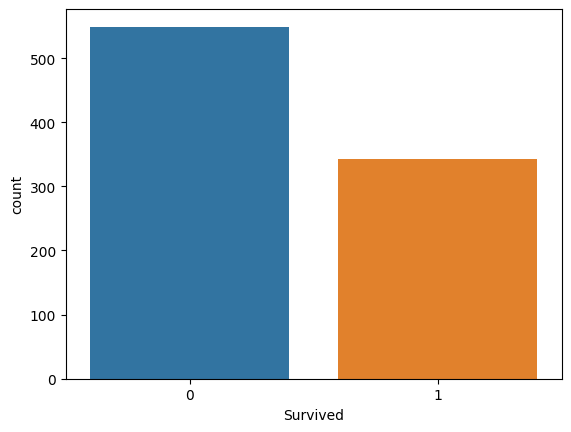

In [ ]:
sns.countplot(x =df['Survived'])

From the below graph we see that passengers of age 30 and below were more in that cruise

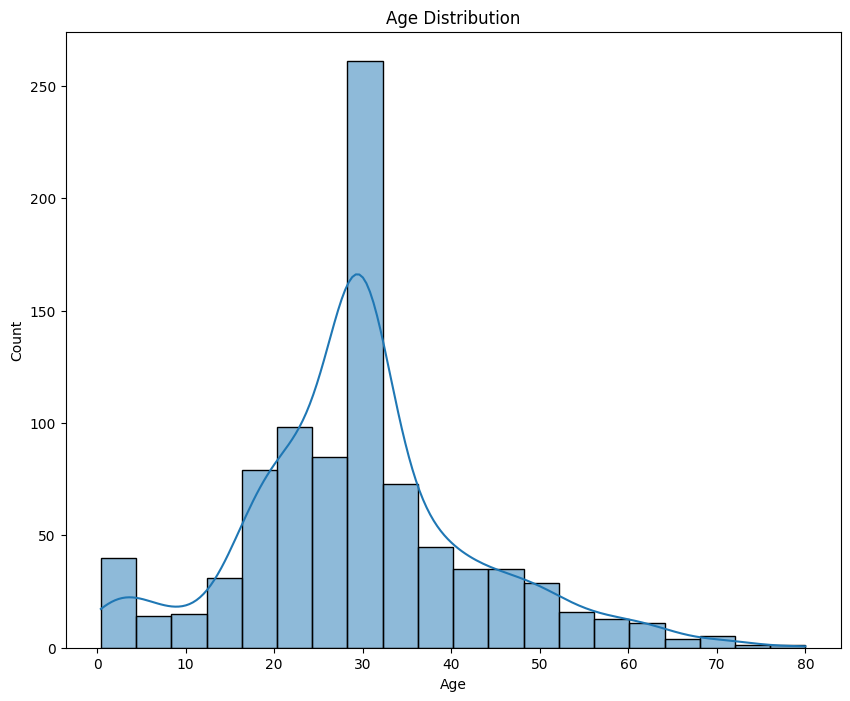

In [ ]:
plt.figure(figsize=(10,8))
sns.histplot(df['Age'],bins=20,kde=True)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show()

# Correlation HeatMap

<ipython-input-19-fd0d5f6989bb>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap='coolwarm',fmt='.2f')


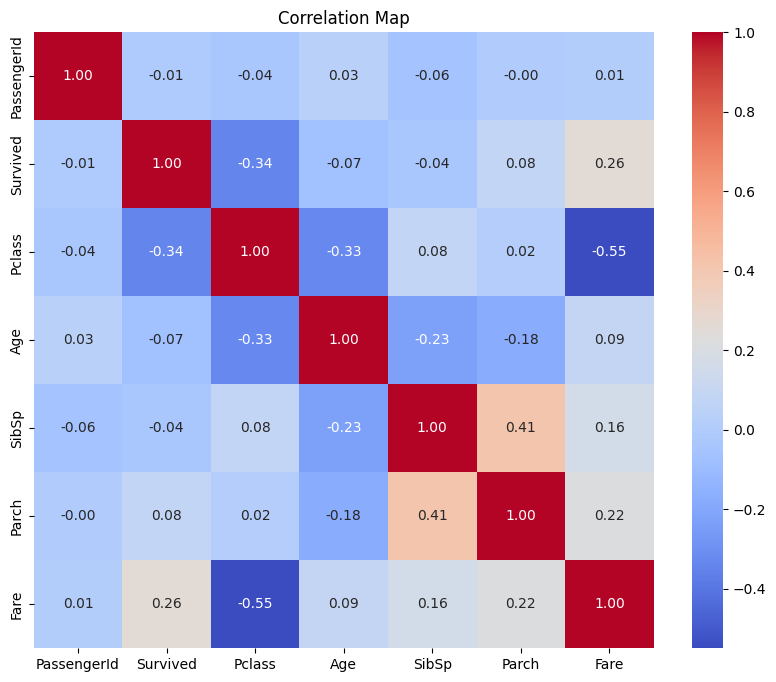

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm',fmt='.2f')
plt.title('Correlation Map')
plt.show()

This graph gives us that sex ratio in that incident

<Axes: xlabel='Sex', ylabel='count'>

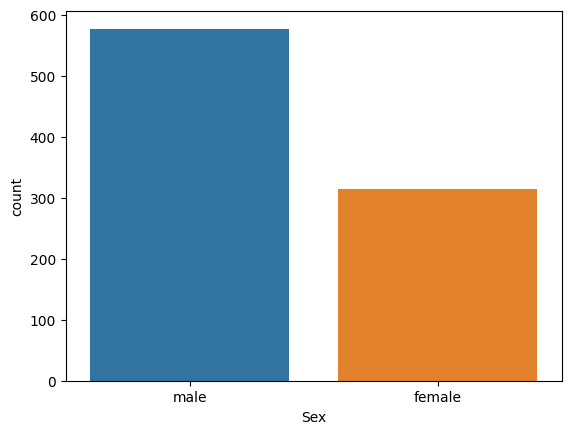

In [ ]:
sns.countplot(x =df['Sex'])

From the below grpah we infer that mostly gentlemen died were dead in that incident

<Axes: xlabel='Sex', ylabel='count'>

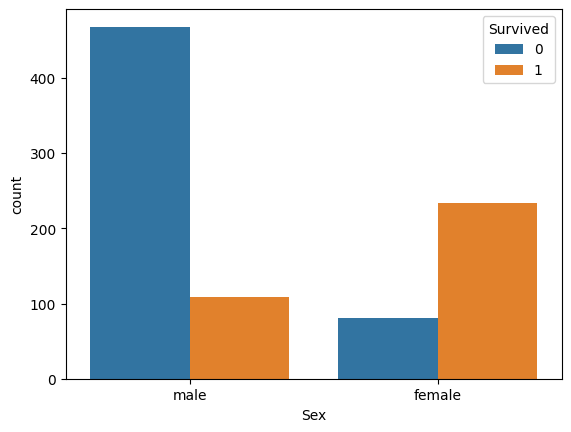

In [ ]:
sns.countplot(x =df['Sex'],hue = df['Survived'])

This indicates that the third class passengers are higher in the titanic

<Axes: xlabel='Pclass', ylabel='count'>

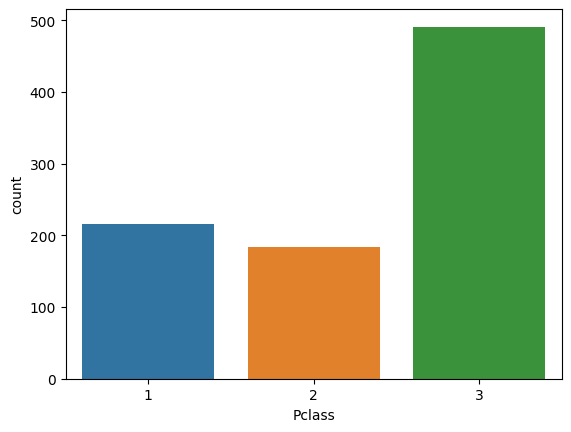

In [ ]:
sns.countplot(data = df , x = 'Pclass')

Here we conclude that second class passengers have the most survival ratio

<Axes: xlabel='Pclass', ylabel='count'>

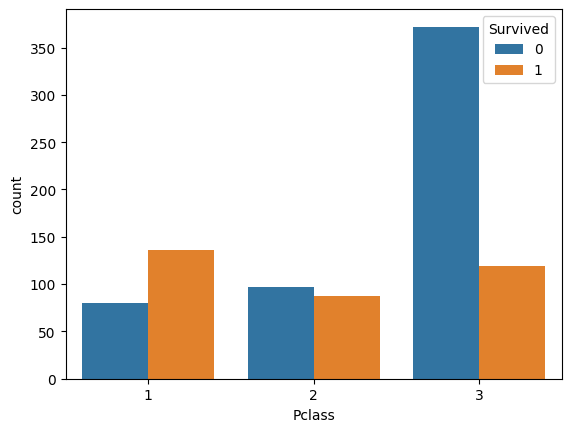

In [ ]:
sns.countplot(data = df , x = 'Pclass', hue = 'Survived')

Many passengers embarked/booarded in the Southampton port

<Axes: xlabel='Embarked', ylabel='count'>

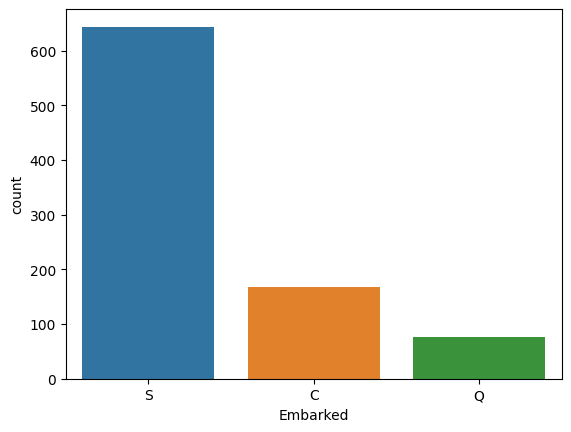

In [ ]:
df['Embarked'].unique()
sns.countplot(data = df , x = 'Embarked')

This give the survival rate for each age of passengers

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


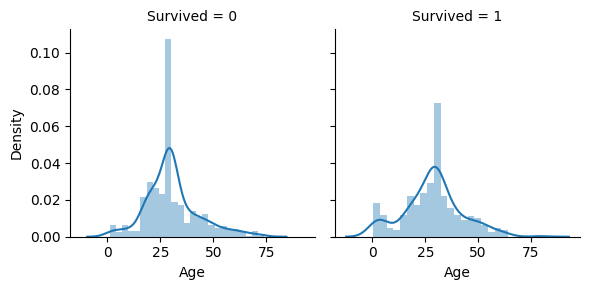

In [ ]:
g = sns.FacetGrid(df, col = "Survived")
g.map(sns.distplot, "Age", bins = 25)
plt.show()